In [1]:
#install library
#!pip install pandas_profiling

import numpy as np
import pandas_profiling
import pandas as pd
import sklearn

# Loading Data
Loading the Instagram Dataset

In [13]:
data = pd.read_csv('insta_merged2021_6_28.csv')
data.head(5)

,Unnamed: 0,id,caption,comments_count,like_count,media_type,media_url,permalink,timestamp,keyword,children
0,0,17879804405354568,L'#emergenzaumanitaria a seguito dell'#alluvio...,0.0,1,IMAGE,https://scontent.cdninstagram.com/v/t51.2885-1...,https://www.instagram.com/p/CPlQRlBCGY4/,2021-06-01T15:10:29+0000,flood,NaN
1,1,17908305037796837,Antincendio boschivo santa Maria di Castellaba...,0.0,18,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPlBdbenGyl/,2021-06-01T13:01:02+0000,none,NaN
2,2,18078877057275278,Ciao! 👋\r\n\r\nOggi vogliamo mostrarvi il nost...,0.0,29,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPkswvxtbvh/,2021-06-01T10:00:10+0000,none,NaN
3,0,18180491500117174,Grazie ai tanti FUORISTRADISTI IN EMERGENZA si...,4.0,464,CAROUSEL_ALBUM,NaN,https://www.instagram.com/p/CPqhXa0sctB/,2021-06-03T16:16:02+0000,none,"{'data': [{'id': '17870644610409396'}, {'id': ..."
4,1,18014021776313726,"Ben prima del Morandi, e di tutti i ponti che ...",0.0,2,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPp_l2QhkqV/,2021-06-03T11:20:55+0000,flood,NaN


In [3]:
#Getting a summary report from pandas profiler
data.profile_report()

In [14]:
#Dropping unneccesary columns
to_drop = ['like_count', 'comments_count','children','media_type']
data.drop(to_drop, axis = 1, inplace = True)
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [5]:
data.head(5)

,id,caption,media_url,permalink,timestamp,keyword
0,17879804405354568,L'#emergenzaumanitaria a seguito dell'#alluvio...,https://scontent.cdninstagram.com/v/t51.2885-1...,https://www.instagram.com/p/CPlQRlBCGY4/,2021-06-01T15:10:29+0000,flood
1,17908305037796837,Antincendio boschivo santa Maria di Castellaba...,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPlBdbenGyl/,2021-06-01T13:01:02+0000,none
2,18078877057275278,Ciao! 👋\r\n\r\nOggi vogliamo mostrarvi il nost...,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPkswvxtbvh/,2021-06-01T10:00:10+0000,none
3,18180491500117174,Grazie ai tanti FUORISTRADISTI IN EMERGENZA si...,NaN,https://www.instagram.com/p/CPqhXa0sctB/,2021-06-03T16:16:02+0000,none
4,18014021776313726,"Ben prima del Morandi, e di tutti i ponti che ...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPp_l2QhkqV/,2021-06-03T11:20:55+0000,flood


In [15]:
#Removing missing values from the caption and timestamp values
data = data[~data.caption.isnull()].copy()
data = data[~data.timestamp.isnull()].copy()
data.shape

(3605, 6)

In [7]:
data.profile_report()

# Text Cleaning 

Doing basic text cleaning functions on the caption column

In [8]:
import string
import nltk
#!{sys.executable} -m pip install contractions
#nltk.download('stopwords')
#nltk.download('wordnet')
import re
from spellchecker import SpellChecker

In [16]:
#Removing punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
data['caption']=data['caption'].apply(lambda x: remove_punctuation(x))
data.head()

,id,caption,media_url,permalink,timestamp,keyword
0,17879804405354568,Lemergenzaumanitaria a seguito dellalluvione c...,https://scontent.cdninstagram.com/v/t51.2885-1...,https://www.instagram.com/p/CPlQRlBCGY4/,2021-06-01T15:10:29+0000,flood
1,17908305037796837,Antincendio boschivo santa Maria di Castellaba...,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPlBdbenGyl/,2021-06-01T13:01:02+0000,none
2,18078877057275278,Ciao 👋\r\n\r\nOggi vogliamo mostrarvi il nostr...,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPkswvxtbvh/,2021-06-01T10:00:10+0000,none
3,18180491500117174,Grazie ai tanti FUORISTRADISTI IN EMERGENZA si...,NaN,https://www.instagram.com/p/CPqhXa0sctB/,2021-06-03T16:16:02+0000,none
4,18014021776313726,Ben prima del Morandi e di tutti i ponti che s...,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPp_l2QhkqV/,2021-06-03T11:20:55+0000,flood


In [17]:
#Removing contractions

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the caption
data['caption']=data['caption'].apply(lambda x:expand_contractions(x))

data.head(10)

,id,caption,media_url,permalink,timestamp,keyword
0,17879804405354568,Lemergenzaumanitaria a seguito dellalluvione c...,https://scontent.cdninstagram.com/v/t51.2885-1...,https://www.instagram.com/p/CPlQRlBCGY4/,2021-06-01T15:10:29+0000,flood
1,17908305037796837,Antincendio boschivo santa Maria di Castellaba...,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPlBdbenGyl/,2021-06-01T13:01:02+0000,none
2,18078877057275278,Ciao 👋\r\n\r\nOggi vogliamo mostrarvi il nostr...,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPkswvxtbvh/,2021-06-01T10:00:10+0000,none
3,18180491500117174,Grazie ai tanti FUORISTRADISTI IN EMERGENZA si...,NaN,https://www.instagram.com/p/CPqhXa0sctB/,2021-06-03T16:16:02+0000,none
4,18014021776313726,Ben prima del Morandi e di tutti i ponti che s...,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPp_l2QhkqV/,2021-06-03T11:20:55+0000,flood
5,17896492634085529,Benvenuto Marco👏👏👏👏 da oggi i ns clienti di Lo...,https://scontent-sea1-1.cdninstagram.com/v/t51...,https://www.instagram.com/p/CPsnS6-jOBW/,2021-06-04T11:46:20+0000,none
6,18116834302230487,Eccolo arrivato\r\ntemporaleestivo temporale p...,https://video-sea1-1.cdninstagram.com/v/t50.28...,https://www.instagram.com/p/CP0w7yXKw_-/,2021-06-07T15:47:03+0000,none
7,17879375747377294,È bastato un temporale per far saltare gli arg...,https://video-sea1-1.cdninstagram.com/v/t50.28...,https://www.instagram.com/p/CP6DeUdKCOM/,2021-06-09T17:07:41+0000,none
8,17916676960739345,i Poracci Dei Caraibi🏴‍☠️ \r\n\r\n\r\n\r\n\r\n...,https://scontent-sea1-1.cdninstagram.com/v/t51...,https://www.instagram.com/p/CP5_-l8l9Xd/,2021-06-09T16:32:08+0000,none
9,17862149546531112,Cerco l estate tutto l anno e all improvviso È...,https://video-sea1-1.cdninstagram.com/v/t50.28...,https://www.instagram.com/p/CP50XiSnmQr/,2021-06-09T14:50:56+0000,none


In [18]:
#Tokenizing the captions and converting words to lowercase
def tokenize(text):
    split=re.split("\W+",text) 
    return split
data['caption']=data['caption'].apply(lambda x: tokenize(x.lower()))
data.head()

,id,caption,media_url,permalink,timestamp,keyword
0,17879804405354568,"[lemergenzaumanitaria, a, seguito, dellalluvio...",https://scontent.cdninstagram.com/v/t51.2885-1...,https://www.instagram.com/p/CPlQRlBCGY4/,2021-06-01T15:10:29+0000,flood
1,17908305037796837,"[antincendio, boschivo, santa, maria, di, cast...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPlBdbenGyl/,2021-06-01T13:01:02+0000,none
2,18078877057275278,"[ciao, oggi, vogliamo, mostrarvi, il, nostro, ...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPkswvxtbvh/,2021-06-01T10:00:10+0000,none
3,18180491500117174,"[grazie, ai, tanti, fuoristradisti, in, emerge...",NaN,https://www.instagram.com/p/CPqhXa0sctB/,2021-06-03T16:16:02+0000,none
4,18014021776313726,"[ben, prima, del, morandi, e, di, tutti, i, po...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPp_l2QhkqV/,2021-06-03T11:20:55+0000,flood


In [19]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
data['caption'] = data['caption'].apply(lambda x: remove_stopwords(x))
data.head()

,id,caption,media_url,permalink,timestamp,keyword
0,17879804405354568,"[lemergenzaumanitaria, seguito, dellalluvione,...",https://scontent.cdninstagram.com/v/t51.2885-1...,https://www.instagram.com/p/CPlQRlBCGY4/,2021-06-01T15:10:29+0000,flood
1,17908305037796837,"[antincendio, boschivo, santa, maria, di, cast...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPlBdbenGyl/,2021-06-01T13:01:02+0000,none
2,18078877057275278,"[ciao, oggi, vogliamo, mostrarvi, il, nostro, ...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPkswvxtbvh/,2021-06-01T10:00:10+0000,none
3,18180491500117174,"[grazie, ai, tanti, fuoristradisti, emergenza,...",NaN,https://www.instagram.com/p/CPqhXa0sctB/,2021-06-03T16:16:02+0000,none
4,18014021776313726,"[ben, prima, del, morandi, e, di, tutti, ponti...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPp_l2QhkqV/,2021-06-03T11:20:55+0000,flood


In [20]:
#Lemmatizing the captions
wnl = nltk.stem.WordNetLemmatizer()
def lemmatize(text):
         text = [wnl.lemmatize(word) for word in text]
         return text

data = data.assign(caption = data.caption.apply(lambda x: lemmatize(x)))
data.head(10)

,id,caption,media_url,permalink,timestamp,keyword
0,17879804405354568,"[lemergenzaumanitaria, seguito, dellalluvione,...",https://scontent.cdninstagram.com/v/t51.2885-1...,https://www.instagram.com/p/CPlQRlBCGY4/,2021-06-01T15:10:29+0000,flood
1,17908305037796837,"[antincendio, boschivo, santa, maria, di, cast...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPlBdbenGyl/,2021-06-01T13:01:02+0000,none
2,18078877057275278,"[ciao, oggi, vogliamo, mostrarvi, il, nostro, ...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPkswvxtbvh/,2021-06-01T10:00:10+0000,none
3,18180491500117174,"[grazie, ai, tanti, fuoristradisti, emergenza,...",NaN,https://www.instagram.com/p/CPqhXa0sctB/,2021-06-03T16:16:02+0000,none
4,18014021776313726,"[ben, prima, del, morandi, e, di, tutti, ponti...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPp_l2QhkqV/,2021-06-03T11:20:55+0000,flood
5,17896492634085529,"[benvenuto, marco, da, oggi, n, clienti, di, l...",https://scontent-sea1-1.cdninstagram.com/v/t51...,https://www.instagram.com/p/CPsnS6-jOBW/,2021-06-04T11:46:20+0000,none
6,18116834302230487,"[eccolo, arrivato, temporaleestivo, temporale,...",https://video-sea1-1.cdninstagram.com/v/t50.28...,https://www.instagram.com/p/CP0w7yXKw_-/,2021-06-07T15:47:03+0000,none
7,17879375747377294,"[è, bastato, un, temporale, per, far, saltare,...",https://video-sea1-1.cdninstagram.com/v/t50.28...,https://www.instagram.com/p/CP6DeUdKCOM/,2021-06-09T17:07:41+0000,none
8,17916676960739345,"[poracci, dei, caraibi, pignetolovers, pigneto...",https://scontent-sea1-1.cdninstagram.com/v/t51...,https://www.instagram.com/p/CP5_-l8l9Xd/,2021-06-09T16:32:08+0000,none
9,17862149546531112,"[cerco, l, estate, tutto, l, anno, e, improvvi...",https://video-sea1-1.cdninstagram.com/v/t50.28...,https://www.instagram.com/p/CP50XiSnmQr/,2021-06-09T14:50:56+0000,none


In [21]:
data.head()

,id,caption,media_url,permalink,timestamp,keyword
0,17879804405354568,"[lemergenzaumanitaria, seguito, dellalluvione,...",https://scontent.cdninstagram.com/v/t51.2885-1...,https://www.instagram.com/p/CPlQRlBCGY4/,2021-06-01T15:10:29+0000,flood
1,17908305037796837,"[antincendio, boschivo, santa, maria, di, cast...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPlBdbenGyl/,2021-06-01T13:01:02+0000,none
2,18078877057275278,"[ciao, oggi, vogliamo, mostrarvi, il, nostro, ...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPkswvxtbvh/,2021-06-01T10:00:10+0000,none
3,18180491500117174,"[grazie, ai, tanti, fuoristradisti, emergenza,...",NaN,https://www.instagram.com/p/CPqhXa0sctB/,2021-06-03T16:16:02+0000,none
4,18014021776313726,"[ben, prima, del, morandi, e, di, tutti, ponti...",https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CPp_l2QhkqV/,2021-06-03T11:20:55+0000,flood


# Exploratory Data Analysis

In [22]:
from wordcloud import WordCloud
from textwrap import wrap

In [23]:
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

In [28]:
captions = data['caption'].transpose()
# Plotting word cloud for each product
for index,caption in (data.keyword):
  generate_wordcloud(data['keyword'],caption)

ValueError: too many values to unpack (expected 2)

In [29]:
from matplotlib import pyplot as plt

TypeError: must be real number, not str

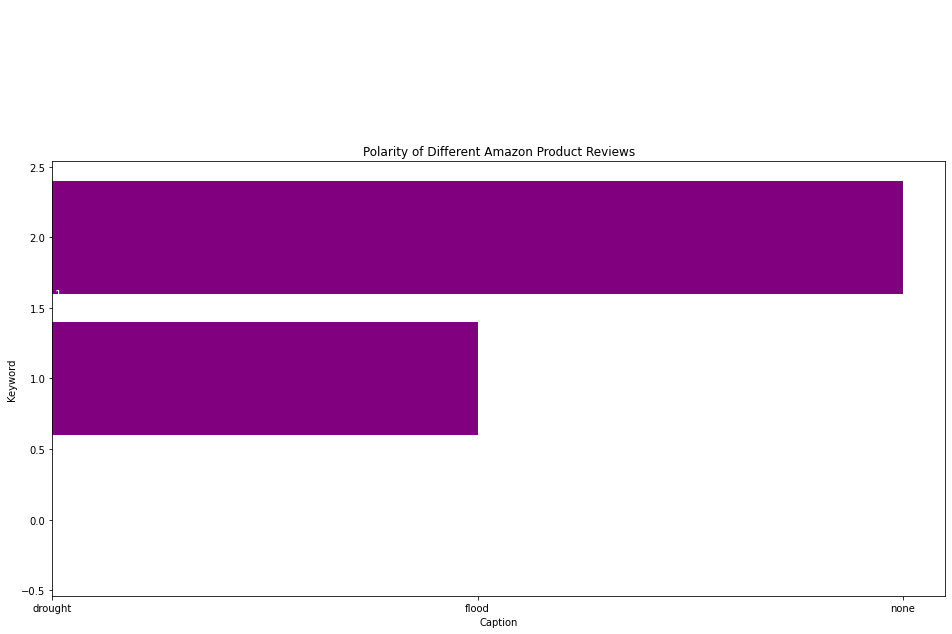

In [48]:
captions_sorted=pd.DataFrame(data.groupby('keyword')['caption'])
captions_sorted.head()

plt.figure(figsize=(16,8))
plt.xlabel('Caption')
plt.ylabel('Keyword')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(captions_sorted.index)),captions_sorted[0],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,captions_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on grap
for bar,polarity in zip(polarity_graph,captions_sorted[0]):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

In [41]:
captions_sorted.head()

,0,1
0,drought,"611 [çölleşme, çölleşmeylemücadele, deserti..."
1,flood,"0 [lemergenzaumanitaria, seguito, dellal..."
2,none,"1 [antincendio, boschivo, santa, maria, ..."
